In [48]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [49]:
def fetch_html_tables(url):
    "Returns a list of tables in the html of url"
    page = requests.get(url)
    bs=BeautifulSoup(page.content)
    tables=bs.find_all('table')
    return tables

tables=fetch_html_tables('https://www.motor.no/aktuelt/motors-store-vintertest-av-rekkevidde-pa-elbiler/217132')
table_html=tables[0]

In [50]:
def html_to_table(html):
    "Returns the table defined in html as a list"

    table=[]

    for row in html.find_all('tr'):
        r=[]

        cells=row.find_all('td')
        

        if len(cells)==0:
            cells=row.find_all('th')
            

        for cell in cells:
            cell=format(cell)
            r.append(cell)
        

        table.append(r)
    return table

def format(cell):
    "Returns a string after converting bs4 object cell to clean text"
    if cell.content is None:
        s=cell.text
    elif len(cell.content)==0:
        return ''
    else:
        s=' '.join([str(c) for c in cell.content])
        

    s=s.replace('\xa0','')
    s=s.replace('\n','')
    return s

table=html_to_table(table_html)

In [51]:
def save_data(file_name,table):
    "Saves table to file_name"
    f=open(file_name,'w')
    for row in table:
        f.write(';'.join(row)+'\n')
    f.close()
    
save_data('cars.csv',table)

In [52]:
cars = pd.read_csv('cars.csv', delimiter=';',on_bad_lines='skip', encoding='latin1')

In [53]:
cars.columns = ['modell', 'wltptall', 'stopp', 'avvik']
cars[['km', 'kWh']] = cars['wltptall'].str.split('/', expand = True)

In [54]:
cars['km'] = cars['km'].str.replace(r'km', '')
cars['kWh'] = cars['kWh'].str.replace(r'kWh', '')
cars['stopp'] = cars['stopp'].str.replace(r'km', '')
cars['avvik'] = cars['avvik'].str.replace(r'%', '')


In [55]:
cars = cars.replace('x','0', regex=True)
cars[['stopp', 'km']] = cars[['stopp', 'km']].apply(pd.to_numeric)
cars_winter = cars.filter(['modell', 'stopp', 'km'], axis=1)

cars_winter

,modell,stopp,km
0,Tesla Model 3 LR Dual motor,521,614
1,Mercedes-Benz EQS 580 4matic,513,645
2,BMW iX 0Drive50,503,591
3,Tesla Model Y LR Dual motor,451,507
4,Volkswagen ID.3 PRO S,435,539
5,Kia EV6 2WD,429,528
6,NIO ES8 LR 7-seter,425,488
7,Kia EV6 4WD,423,484
8,Volkswagen ID.4 Pro,414,485
9,Hyundai Ioniq 5 2WD,408,481


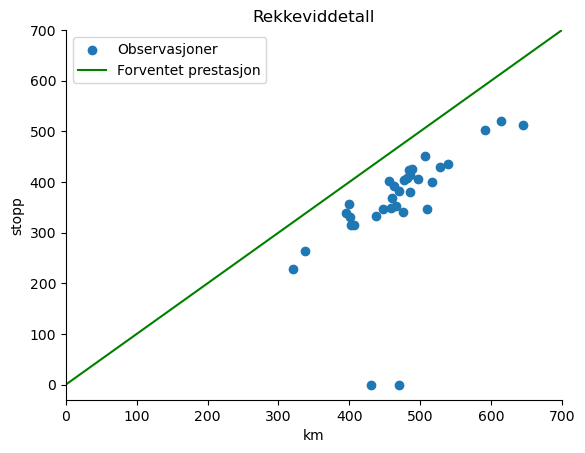

In [56]:
fig, ax = plt.subplots()
x = np.linspace(0, 700, 100)
v = x

ax.scatter(cars_winter['km'], cars_winter['stopp'], label='Observasjoner')

ax.plot(x, v, color='green', label='Forventet prestasjon')

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.set_xlabel('km')
ax.set_ylabel('stopp')
ax.set_xlim(0, 700)
ax.set_ylim(-30, 700)
plt.title('Rekkeviddetall')
ax.legend();

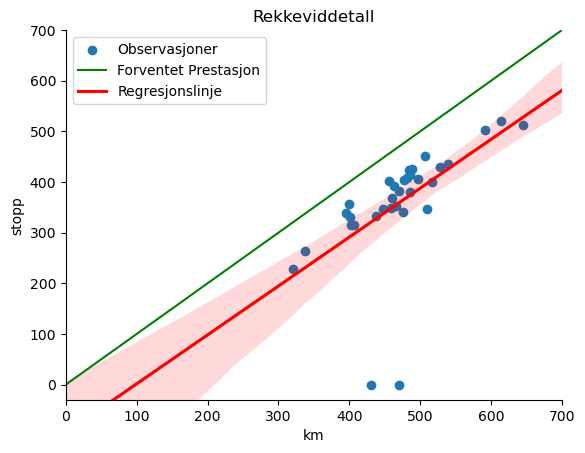

In [59]:
fig, ax = plt.subplots()
x = np.linspace(0, 700, 100)
v = x

ax.scatter(cars_winter['km'], cars_winter['stopp'], label='Observasjoner')

ax.plot(x, v, color='green', label='Forventet Prestasjon')
sns.regplot(x='km', y='stopp', data = cars_winter, truncate=False, scatter=False, color="red", label="Regresjonslinje")

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.set_xlabel('km')
ax.set_ylabel('stopp')
ax.set_xlim(0, 700)
ax.set_ylim(-30, 700)
plt.title('Rekkeviddetall')
ax.legend();